In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [44]:
def load_photos(directory):
    images = []
    labels1 = []
    labels2 = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # convert image to gray
        #img = Image.open(filename).convert('L')
        #img.save(filename)
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        labels1.append(float(name.split('_')[0].split('-')[0]))
        labels2.append(float(name.split('_')[0].split('-')[1]))
        images.append(image)
    return images, labels1, labels2

In [45]:
# load images from both train and test groups
directory = '../data/Patate_Pics/Training-Less-Sorted'
images, labels1, labels2 = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Patate_Pics/Validation'
images_val, labels1_val, labels2_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 199
Loaded Images and labels for validation: 150


In [46]:
#normalise datas
images = np.array(images)
#images = np.resize(images, (199, 160, 100, 3))
images /= 255
images_val = np.array(images_val)
#images_val = np.resize(images_val, (199, 160, 100, 3))
images_val /= 255

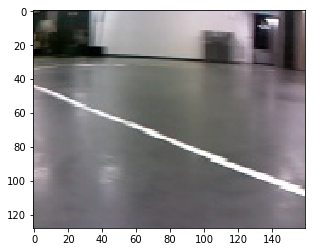

In [47]:
plt.imshow(images[1])

In [9]:
#convert to np.array
labels1 = np.array(labels1)
labels2 = np.array(labels2)
labels1_val = np.array(labels1_val)
labels2_val = np.array(labels2_val)

In [10]:
labels1, labels2, labels1_val, labels2_val

(array([ 0.29,  0.31,  0.33,  0.35,  0.35,  0.35,  0.38,  0.4 ,  0.43,
         0.44,  0.47,  0.47,  0.47,  0.48,  0.48,  0.49,  0.51,  0.51,
         0.51,  0.51,  0.51,  0.51,  0.52,  0.52,  0.52,  0.52,  0.53,
         0.53,  0.53,  0.54,  0.54,  0.54,  0.55,  0.55,  0.55,  0.55,
         0.56,  0.56,  0.56,  0.56,  0.56,  0.56,  0.56,  0.57,  0.57,
         0.57,  0.57,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,
         0.58,  0.59,  0.59,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,
         0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,
         0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.61,  0.61,
         0.61,  0.61,  0.61,  0.61,  0.61,  0.61,  0.61,  0.61,  0.61,
         0.61,  0.61,  0.61,  0.62,  0.62,  0.62,  0.62,  0.62,  0.62,
         0.62,  0.63,  0.63,  0.63,  0.63,  0.63,  0.63,  0.64,  0.64,
         0.64,  0.64,  0.64,  0.64,  0.65,  0.65,  0.65,  0.65,  0.65,
         0.65,  0.66,  0.66,  0.66,  0.66,  0.66,  0.66,  0.66,  0.66,
      

In [37]:
images.shape

(199, 160, 128, 3)

In [11]:
from keras.models import Model
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [23]:
K.clear_session()

img_in = Input(shape=(128, 160, 3), name='img_in')

x = img_in

x = Convolution2D(24, (5,5), strides=(2,2), activation='relu')(x)       # 24 features, 5 pixel x 5 pixel kernel (convolution, feauture) window, 2wx2h stride, relu activation
x = Convolution2D(32, (5,5), strides=(2,2), activation='relu')(x)       # 32 features, 5px5p kernel window, 2wx2h stride, relu activatiion
x = Convolution2D(64, (5,5), strides=(2,2), activation='relu')(x)       # 64 features, 5px5p kernal window, 2wx2h stride, relu
x = Convolution2D(64, (3,3), strides=(2,2), activation='relu')(x)       # 64 features, 3px3p kernal window, 2wx2h stride, relu
x = Convolution2D(64, (3,3), strides=(1,1), activation='relu')(x)       # 64 features, 3px3p kernal window, 1wx1h stride, relu

# Possibly add MaxPooling (will make it less sensitive to position in image).  Camera angle fixed, so may not to be needed

x = Flatten(name='flattened')(x)                                        # Flatten to 1D (Fully connected)
x = Dense(100, activation='relu')(x)                                    # Classify the data into 100 features, make all negatives 0
x = Dropout(.1)(x)                                                      # Randomly drop out (turn off) 10% of the neurons (Prevent overfitting)
x = Dense(50, activation='relu')(x)                                     # Classify the data into 50 features, make all negatives 0
x = Dropout(.1)(x)                                                      # Randomly drop out 10% of the neurons (Prevent overfitting)

#categorical output
out1 = Dense(10, activation='relu')(x)
out1 = Dense(1, activation='linear')(out1)

out2 = Dense(10, activation='relu')(x)
out2 = Dense(1, activation='linear')(out2)

model = Model(inputs=[img_in], outputs=[out1, out2])
model.compile(loss=['mse', 'mse'], optimizer='adadelta', metrics=['mse'])

In [24]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
img_in (InputLayer)              (None, 160, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 78, 62, 24)    1824        img_in[0][0]                     
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 37, 29, 32)    19232       conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 17, 13, 64)    51264       conv2d_2[0][0]                   
___________________________________________________________________________________________

In [28]:
h = model.fit(images, [labels1, labels2], batch_size=1, epochs=50, verbose=1)

Epoch 1/50
199/199 [==============================] - 2s - loss: 0.0461 - dense_4_loss: 0.0248 - dense_6_loss: 0.0213 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 2/50
199/199 [==============================] - 2s - loss: 0.0427 - dense_4_loss: 0.0223 - dense_6_loss: 0.0204 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 3/50
199/199 [==============================] - 2s - loss: 0.0376 - dense_4_loss: 0.0195 - dense_6_loss: 0.0181 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 4/50
199/199 [==============================] - 2s - loss: 0.0318 - dense_4_loss: 0.0169 - dense_6_loss: 0.0148 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 5/50
199/199 [==============================] - 2s - loss: 0.0313 - dense_4_loss: 0.0156 - dense_6_loss: 0.0157 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 6/50
199/199 [==============================] - 2s - loss: 0.0309 - dense_4_loss: 0.0163 - dense_6_loss: 0.0146 - dense

199/199 [==============================] - 3s - loss: 0.0018 - dense_4_loss: 8.2154e-04 - dense_6_loss: 9.6966e-04 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 48/50
199/199 [==============================] - 3s - loss: 0.0021 - dense_4_loss: 0.0011 - dense_6_loss: 0.0010 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     
Epoch 49/50
199/199 [==============================] - 3s - loss: 0.0018 - dense_4_loss: 8.3762e-04 - dense_6_loss: 9.9911e-04 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00   
Epoch 50/50
199/199 [==============================] - 3s - loss: 0.0018 - dense_4_loss: 8.5748e-04 - dense_6_loss: 9.6699e-04 - dense_4_acc: 0.0000e+00 - dense_6_acc: 0.0000e+00     


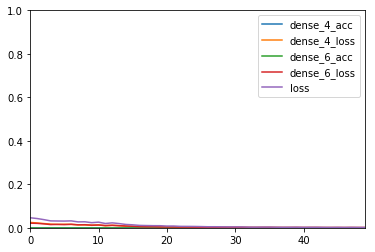

In [29]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [30]:
# Get predictions
all_preds = model.predict(images_val)

all_preds, labels2_val, labels1_val

([array([[ 0.63037479],
         [ 0.67991465],
         [ 0.66024989],
         [ 0.58591962],
         [ 0.67588389],
         [ 0.55845225],
         [ 0.64076358],
         [ 0.60391307],
         [ 0.53961205],
         [ 0.52192545],
         [ 0.60388935],
         [ 0.59626907],
         [ 0.57277763],
         [ 0.58463639],
         [ 0.61831689],
         [ 0.65965104],
         [ 0.66984677],
         [ 0.61356133],
         [ 0.60743427],
         [ 0.68456727],
         [ 0.56419867],
         [ 0.62983072],
         [ 0.5894627 ],
         [ 0.60286695],
         [ 0.50245452],
         [ 0.59017462],
         [ 0.61069894],
         [ 0.61054063],
         [ 0.63929588],
         [ 0.65325093],
         [ 0.5999462 ],
         [ 0.62564409],
         [ 0.54494905],
         [ 0.50752038],
         [ 0.57712835],
         [ 0.6478706 ],
         [ 0.71670532],
         [ 0.62005097],
         [ 0.6296801 ],
         [ 0.47781259],
         [ 0.63340807],
         [ 0.678

In [35]:
import math
i = 0
res = 0

preds = all_preds[0] / all_preds[1]
labels = labels1 / labels2
for value in preds:
    res = res + (value - labels[i])*(value - labels[i])
    i = i + 1
res/i

array([ 0.06742983], dtype=float32)

In [36]:
model.save('model-2x1.h5')

In [ ]:
from keras.models import load_model
model = load_model('test_model.h5')